# 非線形次元削減

現実のアプリケーションではむしろ非線形問題に遭遇することの方がはるかに多い。  
非線形次元削減と多様体学習のアルゴリズムは非常に強力だが、これらの手法は使いにくいことでよく知られている。理想的なハイパーパラメータ設定を選択しないと、それらの手法を使ったことがかえって裏目に出ることもある。評価が困難であることにより、依然として次元削減にPCAやLDAといったより単純な手法を使う人は少なくない。

## t-SNE
（元の）高次元の特徴量空間におけるデータ点のペアごとの距離に基づいてデータ点をモデル化する。そして、新しい低次元の特徴量空間において、元の特徴量空間での確率分布に近い、ペアごとの距離の確率分布を求める。つまり、t-SNEは元の特徴量空間でのペアごとの距離ができるだけ維持されるような方法で、新しい特徴量空間にデータ点を埋め込む方法を学習する。

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

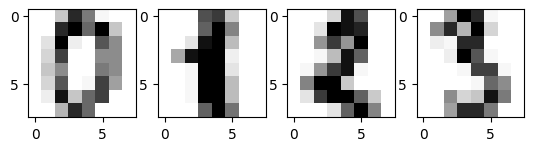

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')
plt.show()

In [3]:
digits.data.shape

(1797, 64)

In [4]:
y_digits = digits.target
X_digits = digits.data
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=123)
# 64 features reduced to 2D
X_digits_tsne = tsne.fit_transform(X_digits)

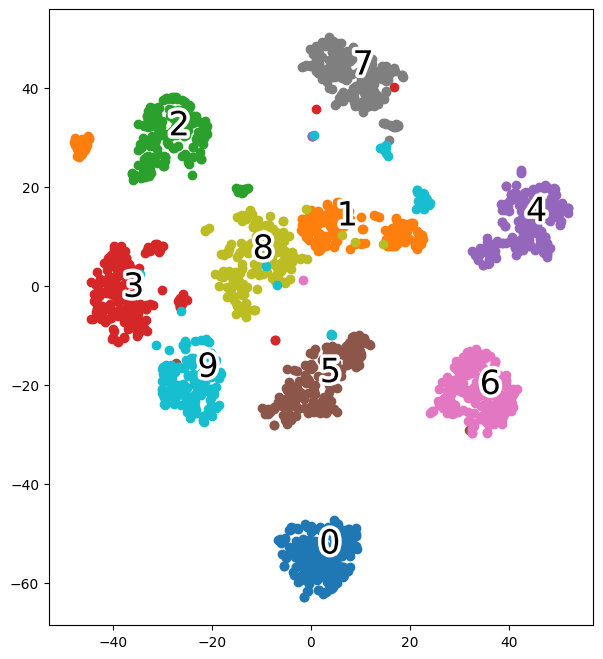

In [5]:
import matplotlib.patheffects as PathEffects
import numpy as np

def plot_projection(x, colors):
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0], x[colors == i, 1])
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground='w'),
                              PathEffects.Normal()])
plot_projection(X_digits_tsne, y_digits)
plt.show()

よく知られているもう1つの可視化手法に**UMAP**(Uniform Manifold Approximation and Projection)がある。  
t-SNEよりも高速で同じくらいよい結果が生成できるらしい。